In [216]:
import sys
sys.path.append("../../")

In [217]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

# Problems

### 1) Heteroskedastic residuals present

There could be some ommitted variable bias present ex:CarName(Brand)

### 2) Multicollinearity present

In [218]:
data=pl.read_csv("errorAnalysed.csv").drop("index")
data

car_ID,curbweight,cylindernumber,carvolume,enginepower,averagempg,price
i64,i64,i64,f64,f64,f64,f64
1,2548,0,528019.904,2.503605e8,23.7,13495.0
3,2823,1,587592.64,3.136672e8,22.15,16500.0
4,2337,0,634816.956,1.9506531e8,26.7,13950.0
5,2824,1,636734.832,2.744038e8,19.8,17450.0
6,2507,1,624189.969,2.624732e8,21.7,15250.0
…,…,…,…,…,…,…
201,2952,0,721961.76,3.28102488e8,25.25,16845.0
202,3049,0,720913.92,4.5196704e8,21.7,19045.0
203,3012,1,721961.76,4.5645358e8,20.25,21485.0


# Adding brand

In [219]:
df=pl.read_csv("CarPrice_Assignment.csv")
l=df["CarName"].str.split(" ")
brands=[]
for i in l:
    brands.append(i[0])
df=df.with_columns(pl.Series(brands).alias("CarName"))

In [222]:
df2=pl.read_csv("preprocessed.csv").drop("carbody","aspiration_std","carbody","drivewheel_fwd","fuelsystem","enginetype")
df2

car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,i64,i64,i64,i64,f64
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,10.0,102,5500,24,30,13950.0
5,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
201,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0


In [223]:
df2=df2.join(df[["car_ID","CarName","fueltype","aspiration","carbody","doornumber","fuelsystem","drivewheel","enginelocation","enginetype"]],on="car_ID").drop("car_ID")

In [232]:
df["CarName"].value_counts()

CarName,count
str,u32
"""subaru""",12
"""toyota""",31
"""vokswagen""",1
"""saab""",6
"""plymouth""",7
…,…
"""peugeot""",11
"""isuzu""",4
"""volvo""",11


In [231]:
df=df.with_columns(df["CarName"].str.replace_many(["porsche"],["porcshce"]))

In [233]:
df.write_csv("visualization.csv")
df

car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,i64,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
1,3,"""alfa-romero""","""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,"""alfa-romero""","""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,"""alfa-romero""","""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,"""audi""","""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
5,2,"""audi""","""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
201,-1,"""volvo""","""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,2952,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,"""volvo""","""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.8,55.5,3049,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,"""volvo""","""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,3012,"""ohcv""","""six""",173,"""mpfi""",3.58,2.87,8.8,134,5500,18,23,21485.0


In [237]:
data=data.join(df[["car_ID","CarName"]],on="car_ID")

In [238]:
data.write_csv("finalized.csv")
data

car_ID,curbweight,cylindernumber,carvolume,enginepower,averagempg,price,CarName
i64,i64,i64,f64,f64,f64,f64,str
1,2548,0,528019.904,2.503605e8,23.7,13495.0,"""alfa-romero"""
3,2823,1,587592.64,3.136672e8,22.15,16500.0,"""alfa-romero"""
4,2337,0,634816.956,1.9506531e8,26.7,13950.0,"""audi"""
5,2824,1,636734.832,2.744038e8,19.8,17450.0,"""audi"""
6,2507,1,624189.969,2.624732e8,21.7,15250.0,"""audi"""
…,…,…,…,…,…,…,…
201,2952,0,721961.76,3.28102488e8,25.25,16845.0,"""volvo"""
202,3049,0,720913.92,4.5196704e8,21.7,19045.0,"""volvo"""
203,3012,1,721961.76,4.5645358e8,20.25,21485.0,"""volvo"""


# target encoding brand with its median price

In [203]:
bv=data.group_by("CarName").agg(pl.mean("price"))
data=data.with_columns(data["CarName"].map_elements(lambda x: bv.filter(bv["CarName"]==x)["price"][0],return_dtype=pl.Float64))

In [204]:
data

curbweight,cylindernumber,carvolume,enginepower,averagempg,price,CarName
i64,i64,f64,f64,f64,f64,f64
2548,0,528019.904,2.503605e8,23.7,13495.0,14997.5
2823,1,587592.64,3.136672e8,22.15,16500.0,14997.5
2337,0,634816.956,1.9506531e8,26.7,13950.0,17859.166714
2824,1,636734.832,2.744038e8,19.8,17450.0,17859.166714
2507,1,624189.969,2.624732e8,21.7,15250.0,17859.166714
…,…,…,…,…,…,…
2952,0,721961.76,3.28102488e8,25.25,16845.0,18063.181818
3049,0,720913.92,4.5196704e8,21.7,19045.0,18063.181818
3012,1,721961.76,4.5645358e8,20.25,21485.0,18063.181818


c:\Users\chavv\anaconda\envs\eda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


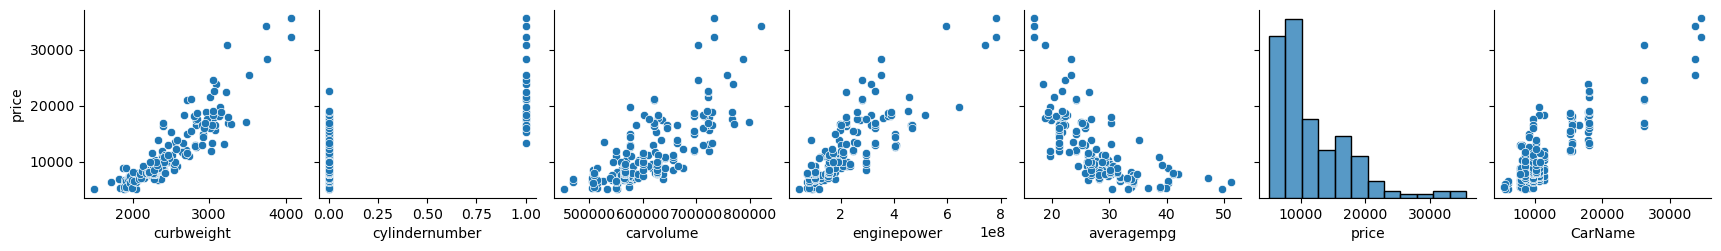

In [178]:
sns.pairplot(data.to_pandas(),y_vars="price")

In [156]:
def condition_index(X):
  if not np.all(X.shape[1] >= 2):
    raise ValueError("Input matrix must have at least two columns.")
  return np.linalg.cond(X)

condition_number = condition_index(data.drop("price"))
print(f"Condition number: {condition_number:.4f}")

Condition number: 1006364281.2264


Very high condition number indicates high multicollinearity

In [157]:
condition_number = condition_index(data.drop("price","cylindernumber","averagempg","curbweight"))
print(f"Condition number: {condition_number:.4f}")

Condition number: 61788.5657


Multicollinearity reduced

In [158]:
data=data.drop("cylindernumber","averagempg","curbweight")

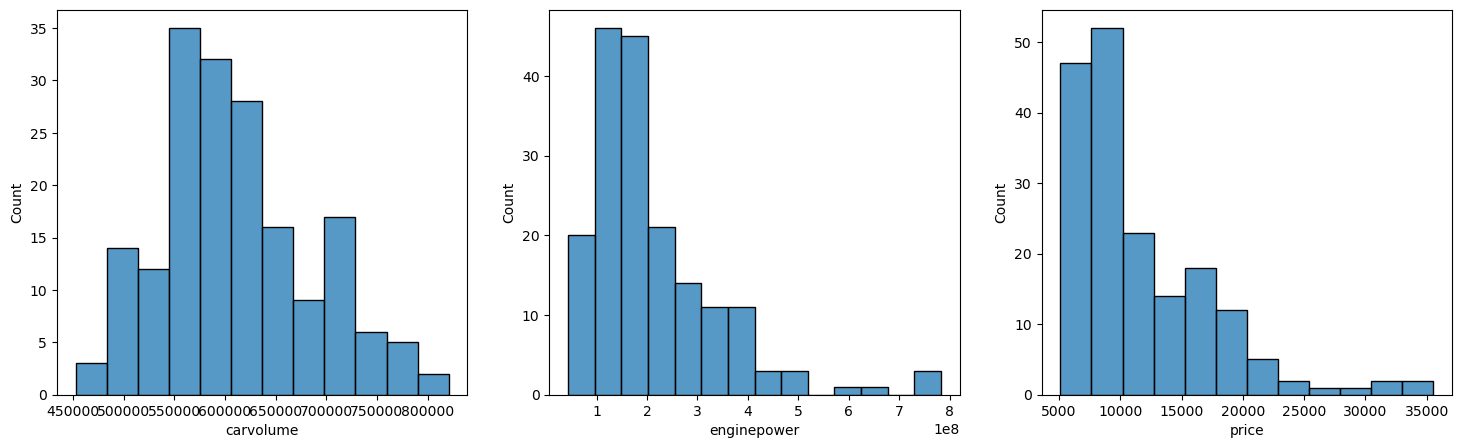

In [159]:
fig,[ax1,ax2,ax3]=  plt.subplots(ncols=3,figsize=(18,5))
sns.histplot(data.to_pandas(),x="carvolume",ax=ax1)
sns.histplot(data.to_pandas(),x="enginepower",ax=ax2)
sns.histplot(data.to_pandas(),x="price",ax=ax3)
plt.show()

enginepower,price is much skewed which is a violation of Assumptions, Applying log (simple way) to make if more normal

In [160]:
# df=data.with_columns(data['enginepower'].log10())
# df=df.with_columns(data['price'].log10())

In [161]:
# fig,[ax1,ax2,ax3]=  plt.subplots(ncols=3,figsize=(18,5))
# sns.histplot(df.to_pandas(),x="carvolume",ax=ax1)
# sns.histplot(df.to_pandas(),x="enginepower",ax=ax2)
# sns.histplot(df.to_pandas(),x="price",ax=ax3)
# plt.show()

# Using models robust to outliers

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict,train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
X=data.drop('price').to_pandas()
y=data['price'].to_pandas()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the pipeline
huber_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("huber", HuberRegressor())
])

# # Define the parameter grid
# param_grid = {
#     'huber__epsilon': np.linspace(1, 4, 30),
#     'huber__alpha': np.linspace(0, 4, 30),
# }

# # Set up the KFold cross-validation
# kf = KFold(n_splits=3)

# # Perform grid search
# grid_search = GridSearchCV(huber_pipe, param_grid, cv=kf, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_epsilon = grid_search.best_params_['huber__epsilon']
# best_alpha = grid_search.best_params_['huber__alpha']
# best_max_iter = grid_search.best_params_['huber__max_iter']

# Set the best parameters and fit the model
huber_pipe.set_params(huber__epsilon=best_epsilon, huber__alpha=best_alpha, huber__max_iter=best_max_iter)
huber_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('huber',
                 HuberRegressor(alpha=0.8275862068965517, epsilon=1.0))])

Mean Absolute Error: 4976.867883383184
R-squared: -0.255165249267983


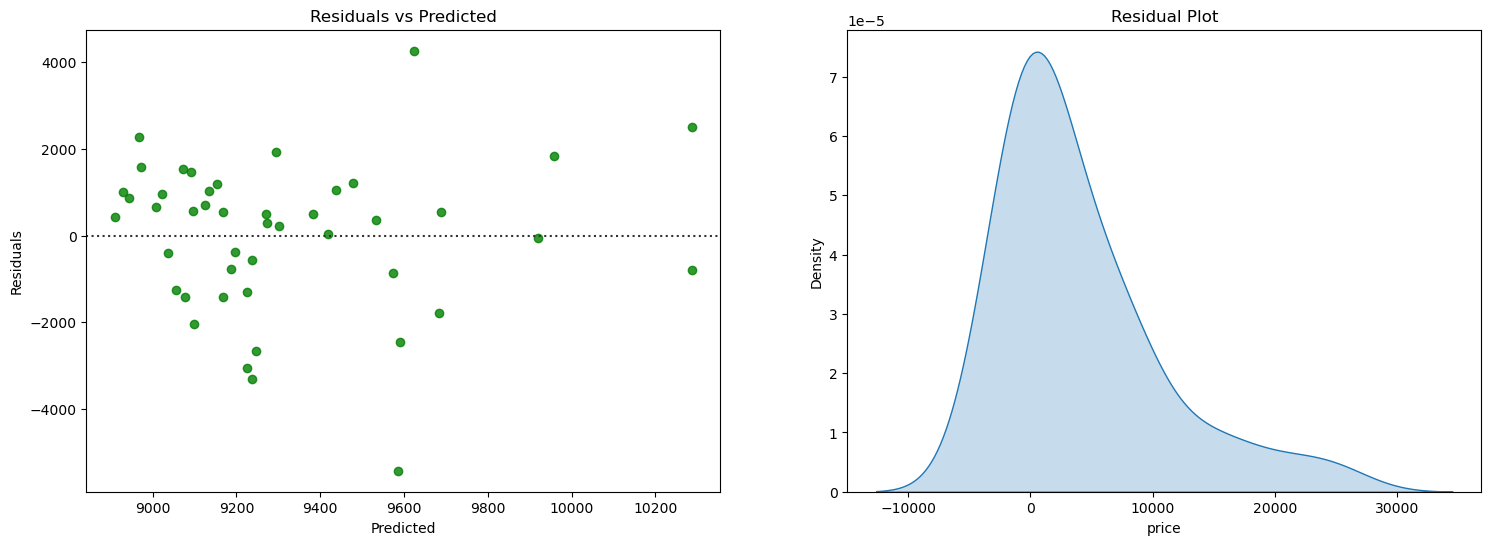

In [164]:
# cv_scores_train = cross_val_score(huber_pipe, X_train, y_train, cv=kf, n_jobs=-1)
# cv_scores_test = cross_val_score(huber_pipe, X_test, y_test, cv=kf, n_jobs=-1)
# predictions = cross_val_predict(huber_pipe, X_test, y_test, cv=kf)
predictions = huber_pipe.predict(X_test)
residuals = y_test - predictions
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# print(f'cross validation scores train: {cv_scores_train}')
# print(f'cross validation scores test: {cv_scores_test}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plotting residuals
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(18, 6))

# Residuals vs Predicted
sns.residplot(x=predictions, y=residuals, color='g', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted')

# KDE plot of residuals
sns.kdeplot(residuals, ax=ax2, fill=True)
ax2.set_title("Residual Plot")

plt.show()

Regularization working,increased bias on train set to increase variance over test set

In [165]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import OLS, add_constant

# Fit the model and calculate residuals
X_with_const = add_constant(X_train)
model = OLS(y_train, X_with_const).fit()
residuals = model.resid

# Perform Breusch-Pagan test
lm_test = het_breuschpagan(residuals, model.model.exog)
lm_stat, lm_pvalue, fvalue, fpvalue = lm_test
print(f'Breusch-Pagan test: LM statistic = {lm_stat}, p-value = {lm_pvalue}')

Breusch-Pagan test: LM statistic = 13.258144328304509, p-value = 0.004110343894748353


# Homoscedasticity Passed

In [166]:
from statsmodels.stats.stattools import durbin_watson
# Perform the Durbin-Watson test
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 1.9405575736370482


# No Auto Correlation

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm
a=sm.add_constant(X_train)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = a.columns
vif_data['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
print(vif_data)

       feature        VIF
0        const  90.940881
1    carvolume   1.888802
2  enginepower   1.561691
3      CarName   1.958450


# No multicollinearity

In [168]:
# predictions_logless = np.power(10, predictions)

# # Inverse transform y_test_log to get it back to the original scale
# y_test_logless = np.power(10,y_test)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test_logless, predictions_logless)
# r2 = r2_score(y_test_logless, predictions_logless)

# print(f'Mean Absolute Error (Original Scale): {mae}')
# print(f'R-squared (Original Scale): {r2}')

Absolute error increased little from 1820 to 2090,but reults more reliable by the assumptions of linear regression

Or we can still multicollinear features if we are only concerned about predictions As the coefficients are still unbiased

ValueError: x and y must be the same size

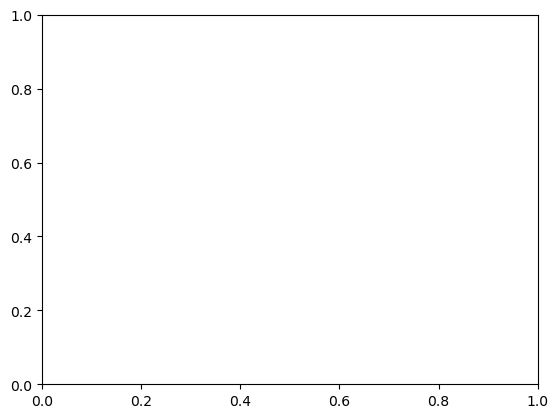

In [169]:
plt.scatter(X_test["enginepower"],predictions_logless)
plt.scatter(X_test["enginepower"],y_test_logless)
plt.title("test data")
plt.legend(["predictions", "actual"])

In [ ]:
predictions = cross_val_predict(huber_pipe, X, y, cv=kf)

residuals = y - predictions
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)
predictions_logless = np.power(10, predictions)

# Inverse transform y_log to get it back to the original scale
y_logless = np.power(10,y)

# Calculate evaluation metrics
mae = mean_absolute_error(y_logless, predictions_logless)
r2 = r2_score(y_logless, predictions_logless)

print(f'Mean Absolute Error (Original Scale): {mae}')
print(f'R-squared (Original Scale): {r2}')
plt.scatter(X["enginepower"].pow(10),predictions_logless)
plt.scatter(X["enginepower"].pow(10),y_logless)
plt.title("Total data")
plt.legend(["predictions", "actual"])
plt.show()

C:\Users\chavv\AppData\Local\Temp\ipykernel_20696\2971596035.py:6: RuntimeWarning: overflow encountered in power
  predictions_logless = np.power(10, predictions)


ValueError: Input contains infinity or a value too large for dtype('float64').

# Covers good amount of variance reliably